# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report, accuracy_score

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
df_clustering = pd.read_csv('https://raw.githubusercontent.com/syifagusriani/pad-assets/refs/heads/main/app_clustering.csv')
df_clustering

,prime_genre_count,cont_rating,size_bytes,price,user_rating,Cluster
0,3023.0,0.0,0.024892,0.013300,0.689093,0
1,116.0,0.0,0.039248,0.000000,0.690853,1
2,69.0,0.0,0.024826,0.000000,0.536558,2
3,45.0,0.0,0.022901,0.000000,0.845613,3
4,3023.0,0.0,0.002458,0.003300,0.685995,0
...,...,...,...,...,...,...
5397,3023.0,3.0,0.006773,0.009967,0.550051,26
5398,3023.0,0.0,0.031315,0.000000,0.641524,0
5399,3023.0,0.0,0.029853,0.000000,0.572226,0
5400,3023.0,2.0,0.024009,0.000000,0.611295,13


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [3]:
# Memisahkan fitur (X) dan target (y)
x = df_clustering.drop(columns=['Cluster'])
y = df_clustering['Cluster']

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Menampilkan data
print("Jumlah data: ",len(x))
print("Jumlah data latih: ",len(x_train))
print("Jumlah data test: ",len(x_test))

Jumlah data:  5402
Jumlah data latih:  4321
Jumlah data test:  1081


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [5]:
# Menjalankan model
rf = RandomForestClassifier().fit(x_train, y_train)
svm = SVC().fit(x_train, y_train)

print("Model training selesai.")

Model training selesai.


Untuk mengklasifikasikan dataset yang memiliki 5 fitur dan 5402 baris data, saya menggunakan dua algoritma populer dalam supervised learning, yaitu Random Forest dan Support Vector Machine (SVM).

- Saya menggunakan Random Forest karena algoritma ini terdiri dari banyak decision tree yang bekerja secara bersamaan untuk membuat prediksi, dan setiap pohon dilatih dengan bagian data yang berbeda. Hasil akhirnya diambil dari voting mayoritas pohon-pohon tersebut, sehingga algoritma ini lebih stabil dan jarang overfitting.

- Saya juga menggunakan SVM (Support Vector Machine) karena algoritma ini dikenal efektif saat bekerja dengan dataset berdimensi kecil hingga menengah. SVM bekerja dengan mencari garis atau bidang pemisah terbaik yang bisa memisahkan data dari dua kelas dengan margin terlebar.

Perbedaan kedua model ini cukup signifikan sehingga bisa dijadikan bahan untuk analisis mana yang lebih cocok dengan dataset saya.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

### Evaluasi Confusion Matrix untuk model Random Forest

Hasil Latih Model Random Forest
      Metric Train Score Test Score
0   Accuracy     100.00%     96.30%
1  Precision     100.00%     96.30%
2     Recall     100.00%     96.30%
3   F1-Score     100.00%     96.20%

Total TP: 1041
Total FP: 0
Total FN: 40
Total TN: 0


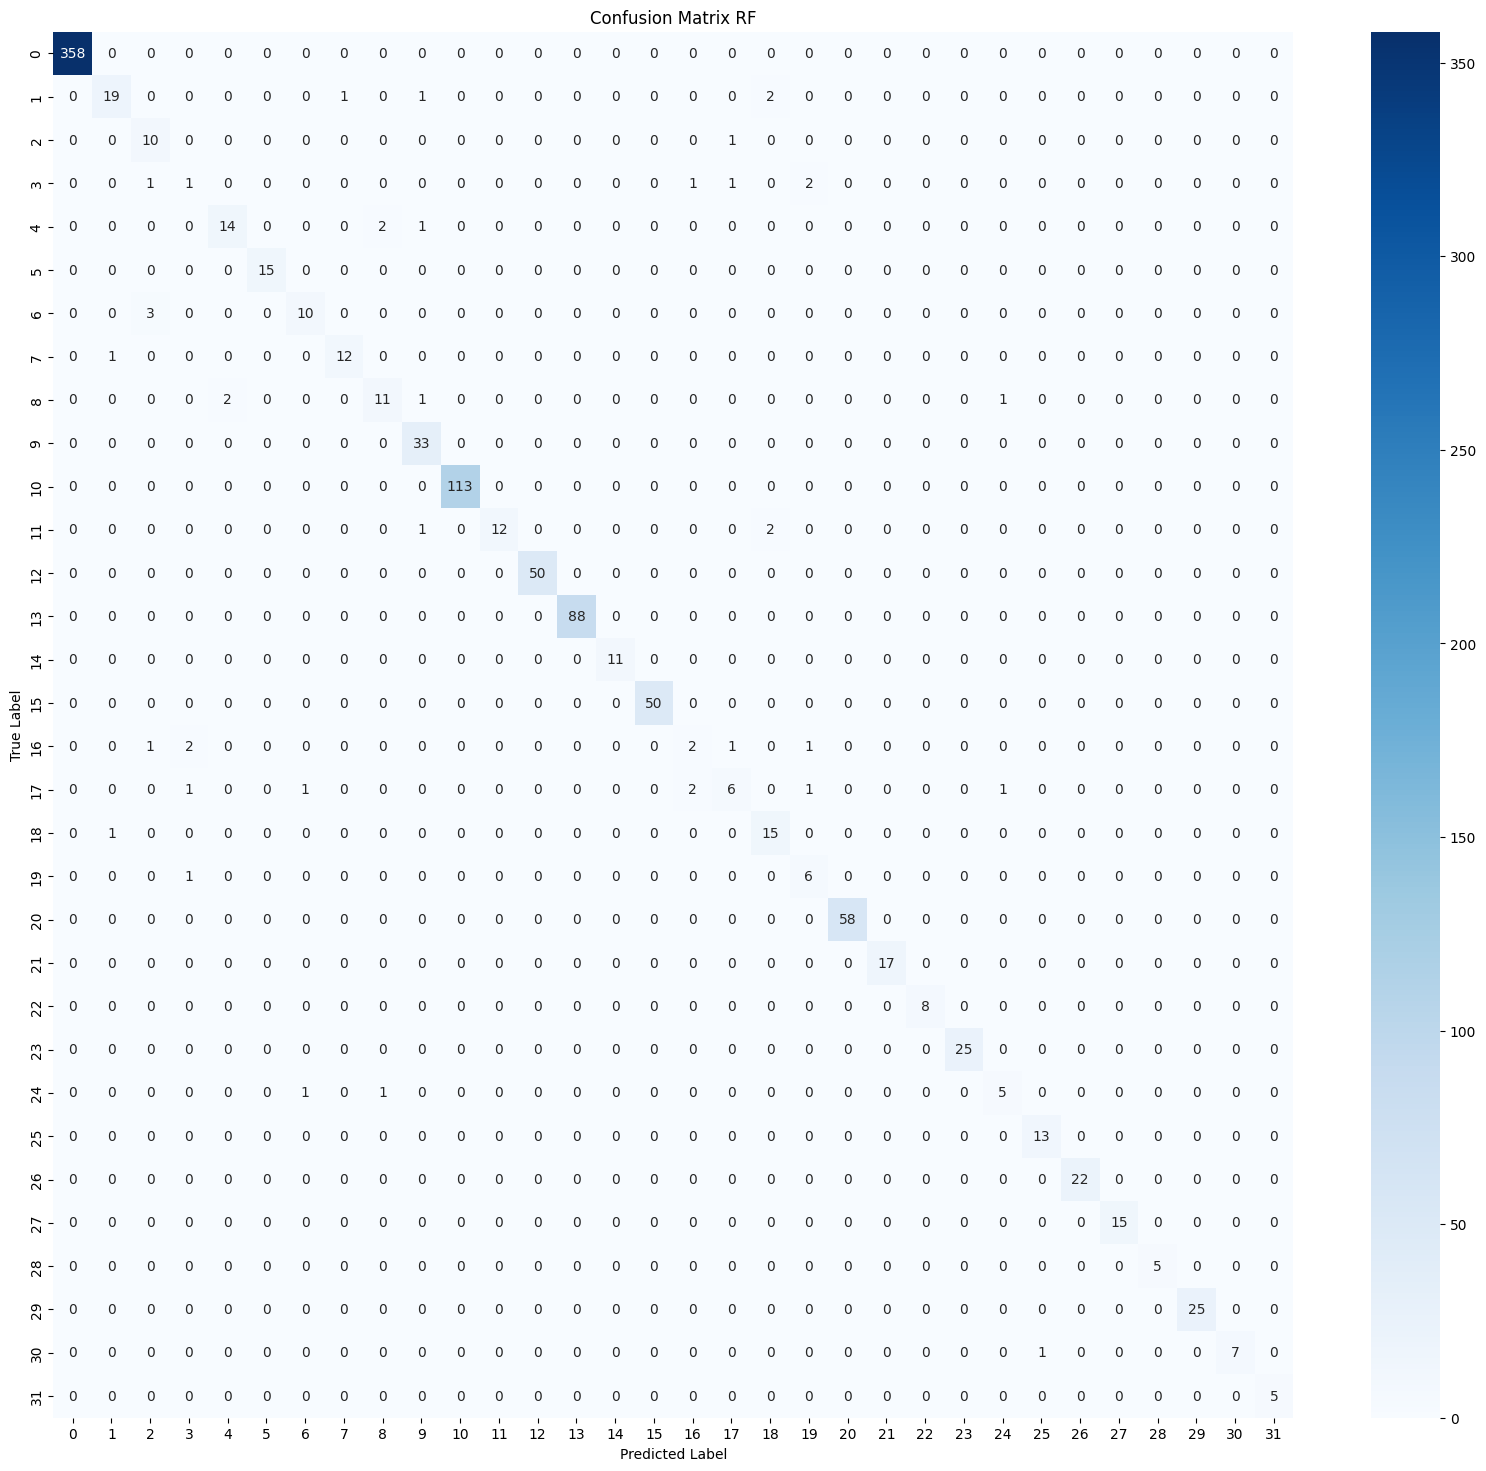

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       358
           1       0.90      0.83      0.86        23
           2       0.67      0.91      0.77        11
           3       0.20      0.17      0.18         6
           4       0.88      0.82      0.85        17
           5       1.00      1.00      1.00        15
           6       0.83      0.77      0.80        13
           7       0.92      0.92      0.92        13
           8       0.79      0.73      0.76        15
           9       0.89      1.00      0.94        33
          10       1.00      1.00      1.00       113
          11       1.00      0.80      0.89        15
          12       1.00      1.00      1.00        50
          13       1.00      1.00      1.00        88
          14       1.00      1.00      1.00        11
          15       1.00      1.00      1.00        50
          16       0.40      0.29      0.33         7
    

In [6]:
y_train_pred_rf = rf.predict(x_train)
y_test_pred_rf = rf.predict(x_test)

# Evaluasi
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
train_precision_rf = precision_score(y_train, y_train_pred_rf, average='weighted', zero_division=1)
test_precision_rf = precision_score(y_test, y_test_pred_rf, average='weighted', zero_division=1)
train_recall_rf = recall_score(y_train, y_train_pred_rf, average='weighted', zero_division=1)
test_recall_rf = recall_score(y_test, y_test_pred_rf, average='weighted', zero_division=1)
train_f1_rf = f1_score(y_train, y_train_pred_rf, average='weighted', zero_division=1)
test_f1_rf = f1_score(y_test, y_test_pred_rf, average='weighted', zero_division=1)

print("Hasil Latih Model Random Forest")
evaluation_df_rf = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Train Score': [train_accuracy_rf, train_precision_rf, train_recall_rf, train_f1_rf],
    'Test Score': [test_accuracy_rf, test_precision_rf, test_recall_rf, test_f1_rf]
})

# Konversi ke format persen
evaluation_df_rf[['Train Score', 'Test Score']] = evaluation_df_rf[['Train Score', 'Test Score']].map(lambda x: f"{x:.2%}")

# Menampilkan DataFrame
print(evaluation_df_rf, end='\n\n')

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_test_pred_rf)

# Menghitung TP, FP, FN, TN secara keseluruhan
tp_rf = np.sum(np.diag(cm_rf))
fp_rf = np.sum(cm_rf) - np.sum(np.diag(cm_rf)) - np.sum(np.sum(cm_rf, axis=1) - np.diag(cm_rf))
fn_rf = np.sum(np.sum(cm_rf, axis=1) - np.diag(cm_rf))  # FN total
tn_rf = np.sum(cm_rf) - (tp_rf + fp_rf + fn_rf)

# Menampilkan hasil
print(f"Total TP: {tp_rf}")
print(f"Total FP: {fp_rf}")
print(f"Total FN: {fn_rf}")
print(f"Total TN: {tn_rf}")

# Visualisasi Confusion Matrix
plt.figure(figsize=(20, 18))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.title('Confusion Matrix RF')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification Report (Precision, Recall, F1-Score, etc.)
print("Classification Report:")
print(classification_report(y_test, y_test_pred_rf, zero_division=1))

# Cek distribusi kelas pada data uji
print("Distribusi kelas pada data uji:")
print("Distribusi y_test:", dict(zip(*np.unique(y_test, return_counts=True))))
print("Distribusi y_test_pred:", dict(zip(*np.unique(y_test_pred_rf, return_counts=True))))

### Evaluasi Confusion Matrix untuk model SVM

Hasil Latih Model Support Vector Machine (SVM)
      Metric Train Score Test Score
0   Accuracy      44.85%     43.11%
1  Precision      75.77%     76.26%
2     Recall      44.85%     43.11%
3   F1-Score      32.40%     31.27%

Total TP: 466
Total FP: 0
Total FN: 615
Total TN: 0


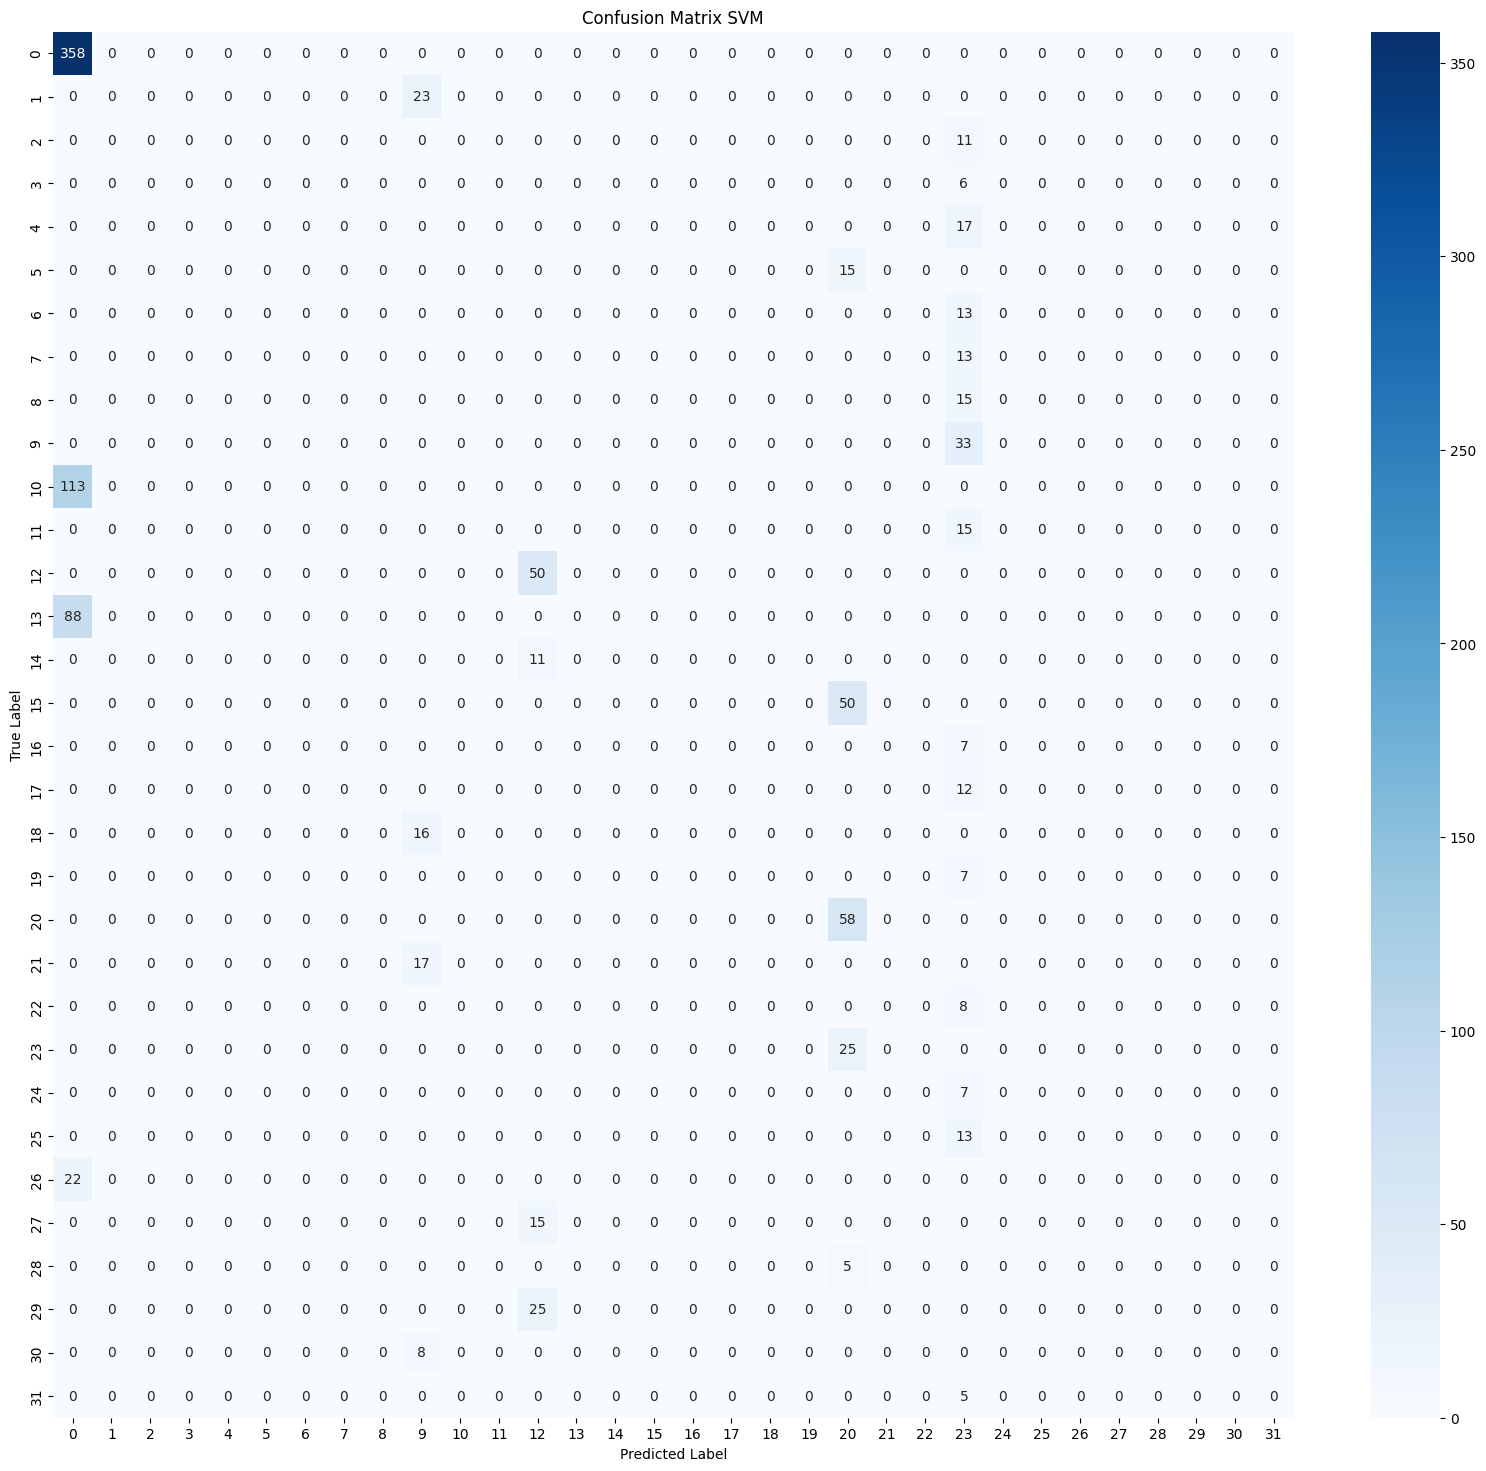

Classification Report:
              precision    recall  f1-score   support

           0       0.62      1.00      0.76       358
           1       1.00      0.00      0.00        23
           2       1.00      0.00      0.00        11
           3       1.00      0.00      0.00         6
           4       1.00      0.00      0.00        17
           5       1.00      0.00      0.00        15
           6       1.00      0.00      0.00        13
           7       1.00      0.00      0.00        13
           8       1.00      0.00      0.00        15
           9       0.00      0.00      0.00        33
          10       1.00      0.00      0.00       113
          11       1.00      0.00      0.00        15
          12       0.50      1.00      0.66        50
          13       1.00      0.00      0.00        88
          14       1.00      0.00      0.00        11
          15       1.00      0.00      0.00        50
          16       1.00      0.00      0.00         7
    

In [7]:
y_train_pred_svm = svm.predict(x_train)
y_test_pred_svm = svm.predict(x_test)

# Evaluasi
train_accuracy_svm = accuracy_score(y_train, y_train_pred_svm)
test_accuracy_svm = accuracy_score(y_test, y_test_pred_svm)
train_precision_svm = precision_score(y_train, y_train_pred_svm, average='weighted', zero_division=1)
test_precision_svm = precision_score(y_test, y_test_pred_svm, average='weighted', zero_division=1)
train_recall_svm = recall_score(y_train, y_train_pred_svm, average='weighted', zero_division=1)
test_recall_svm = recall_score(y_test, y_test_pred_svm, average='weighted', zero_division=1)
train_f1_svm = f1_score(y_train, y_train_pred_svm, average='weighted', zero_division=1)
test_f1_svm = f1_score(y_test, y_test_pred_svm, average='weighted', zero_division=1)

print("Hasil Latih Model Support Vector Machine (SVM)")
evaluation_df_svm = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Train Score': [train_accuracy_svm, train_precision_svm, train_recall_svm, train_f1_svm],
    'Test Score': [test_accuracy_svm, test_precision_svm, test_recall_svm, test_f1_svm]
})

# Konversi ke format persen
evaluation_df_svm[['Train Score', 'Test Score']] = evaluation_df_svm[['Train Score', 'Test Score']].map(lambda x: f"{x:.2%}")

# Menampilkan DataFrame
print(evaluation_df_svm, end='\n\n')

# Confusion Matrix
cm_svm = confusion_matrix(y_test, y_test_pred_svm)

# Menghitung TP, FP, FN, TN secara keseluruhan
tp_svm = np.sum(np.diag(cm_svm))
fp_svm = np.sum(cm_svm) - np.sum(np.diag(cm_svm)) - np.sum(np.sum(cm_svm, axis=1) - np.diag(cm_svm))
fn_svm = np.sum(np.sum(cm_svm, axis=1) - np.diag(cm_svm))
tn_svm = np.sum(cm_svm) - (tp_svm + fp_svm + fn_svm)

# Menampilkan hasil
print(f"Total TP: {tp_svm}")
print(f"Total FP: {fp_svm}")
print(f"Total FN: {fn_svm}")
print(f"Total TN: {tn_svm}")

# Visualisasi Confusion Matrix
plt.figure(figsize=(20, 18))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=svm.classes_, yticklabels=svm.classes_)
plt.title('Confusion Matrix SVM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification Report (Precision, Recall, F1-Score, etc.)
print("Classification Report:")
print(classification_report(y_test, y_test_pred_svm, zero_division=1))

# Cek distribusi kelas pada data uji
print("Distribusi kelas pada data uji:")
print("Distribusi y_test:", dict(zip(*np.unique(y_test, return_counts=True))))
print("Distribusi y_pred:", dict(zip(*np.unique(y_test_pred_svm, return_counts=True))))

### Evaluasi kedua model setelah latih pertama

Dari hasil performa kedua model, dapat dilihat bahwa pada model Random Forest menunjukkan performa yang jauh lebih baik dibandingkan dengan SVM. Dengan accuracy lebih dari 96% pada data uji, serta precision, recall, dan f1-score yang tinggi, Random Forest lebih mampu menangani kompleksitas data dan beradaptasi dengan baik pada data uji. Namun sayangnya, hal ini mengindikasikan terjadinya overfit karena hasil akurasi data latih mendapatkan nilai sempurna di semua parameter (100%). Sementara untuk model SVM, meskipun precision cukup baik, nilai recall dan f1-score yang rendah pada kedua skema (train dan test) menunjukkan bahwa model ini tidak dapat menangkap pola dengan baik. Accuracy yang rendah mengindikasikan model tidak cukup optimal untuk dataset ini, dan mungkin perlu dilakukan tuning hyperparameter lebih lanjut atau eksperimen dengan kernel yang berbeda.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [8]:
x_second_train, x_second_test, y_second_train, y_second_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Tuning Model Random Forest

In [9]:
# Random Search Tuning untuk RandomForest
param_dist_rf = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', None],
    'random_state': [42]
}

random_search_rf = RandomizedSearchCV(estimator=rf, param_distributions=param_dist_rf,
                                      n_iter=30, cv=5, random_state=42, n_jobs=-1, verbose=2)

random_search_rf.fit(x_second_train, y_second_train)

# Menampilkan seluruh hasil akurasi dari setiap percobaan
results = pd.DataFrame(random_search_rf.cv_results_)

# Pilih kolom yang relevan
results = results[['param_n_estimators', 'param_max_depth', 'param_min_samples_split',
                   'param_min_samples_leaf','param_class_weight' ,'param_random_state',
                   'mean_test_score', 'std_test_score', 'rank_test_score']]

# Urutkan berdasarkan peringkat hasil (rank)
results = results.sort_values(by='rank_test_score')

# Menampilkan hasil
print(results)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
    param_n_estimators param_max_depth  param_min_samples_split  \
22                 200            None                        5   
8                  200              30                        5   
3                  300              20                        5   
19                 500              30                        2   
24                 200              30                        2   
0                  200              20                       10   
28                 500            None                        2   
6                  300              20                       10   
12                 100            None                       10   
14                 100              20                       10   
16                 200              10                        5   
5                  200              10                       10   
21                 100              30                        2   


### Tuning Model SVM

In [10]:
# Random Search Tuning
# Skema 1
param_dist_scale_svm = {
    'kernel': ['rbf', 'poly', 'linear', 'sigmoid'],
    'gamma': ['scale'],
    'C': [0.1,1],
    'degree': [1,2]
}
random_search_scale_svm = RandomizedSearchCV(estimator=svm, param_distributions=param_dist_scale_svm,
                                      n_iter=10, cv=5, random_state=42, n_jobs=-1, verbose=2)
random_search_scale_svm.fit(x_train, y_train)

# Skema 2
param_dist_auto_svm = {
    'kernel': ['rbf'],
    'gamma': ['auto'],
    'C': [0.1,1],
    'degree': [1,2]
}
random_search_auto_svm = RandomizedSearchCV(estimator=svm, param_distributions=param_dist_auto_svm,
                                      n_iter=4, cv=5, random_state=42, n_jobs=-1, verbose=2)
random_search_auto_svm.fit(x_second_train, y_second_train)

# Menampilkan seluruh hasil akurasi dari setiap percobaan
results1 = pd.DataFrame(random_search_scale_svm.cv_results_)
results2 = pd.DataFrame(random_search_auto_svm.cv_results_)

# Pilih kolom yang relevan
results1 = results1[['param_kernel', 'param_gamma', 'param_C', 'param_degree',
                   'mean_test_score', 'std_test_score', 'rank_test_score']]
results2 = results2[['param_kernel', 'param_gamma', 'param_C', 'param_degree',
                   'mean_test_score', 'std_test_score', 'rank_test_score']]

# Urutkan berdasarkan peringkat hasil (rank)
results1 = results1.sort_values(by='rank_test_score')
results2 = results2.sort_values(by='rank_test_score')

print(results1)
print(results2)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
  param_kernel param_gamma  param_C  param_degree  mean_test_score  \
3       linear       scale      1.0             2         1.000000   
8       linear       scale      0.1             1         1.000000   
6          rbf       scale      1.0             1         0.448507   
0          rbf       scale      0.1             1         0.404073   
1         poly       scale      0.1             1         0.404073   
2         poly       scale      0.1             2         0.404073   
4         poly       scale      1.0             2         0.404073   
5      sigmoid       scale      1.0             1         0.404073   
7         poly       scale      1.0             1         0.404073   
9      sigmoid       scale      1.0             2         0.404073   

   std_test_score  rank_test_score  
3        0.000000                1  
8        0.000000                1

Note: Saya melakukan proses random search terpisah dibagian svm ini karena saat beberapa parameter tersebut disatukan, prosesnya lama dan malah crash terus menerus

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [11]:
# Menggunakan model dengan hyperparameter terbaik setelah random search
rf_second = RandomForestClassifier(n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_depth=None, class_weight='balanced', random_state=42).fit(x_second_train, y_second_train)
svm_second = SVC(kernel='rbf', gamma='auto', degree=1, C=0.1, random_state=42).fit(x_second_train, y_second_train)

print("Model training selesai.")

Model training selesai.


### Evaluasi Confusion Matrix untuk model Random Forest setelah tuning

Hasil Latih Model Random Forest Setelah Tuning
      Metric Train Score Test Score
0   Accuracy     100.00%     99.26%
1  Precision     100.00%     99.33%
2     Recall     100.00%     99.26%
3   F1-Score     100.00%     99.25%

Total TP: 1073
Total FP: 0
Total FN: 8
Total TN: 0


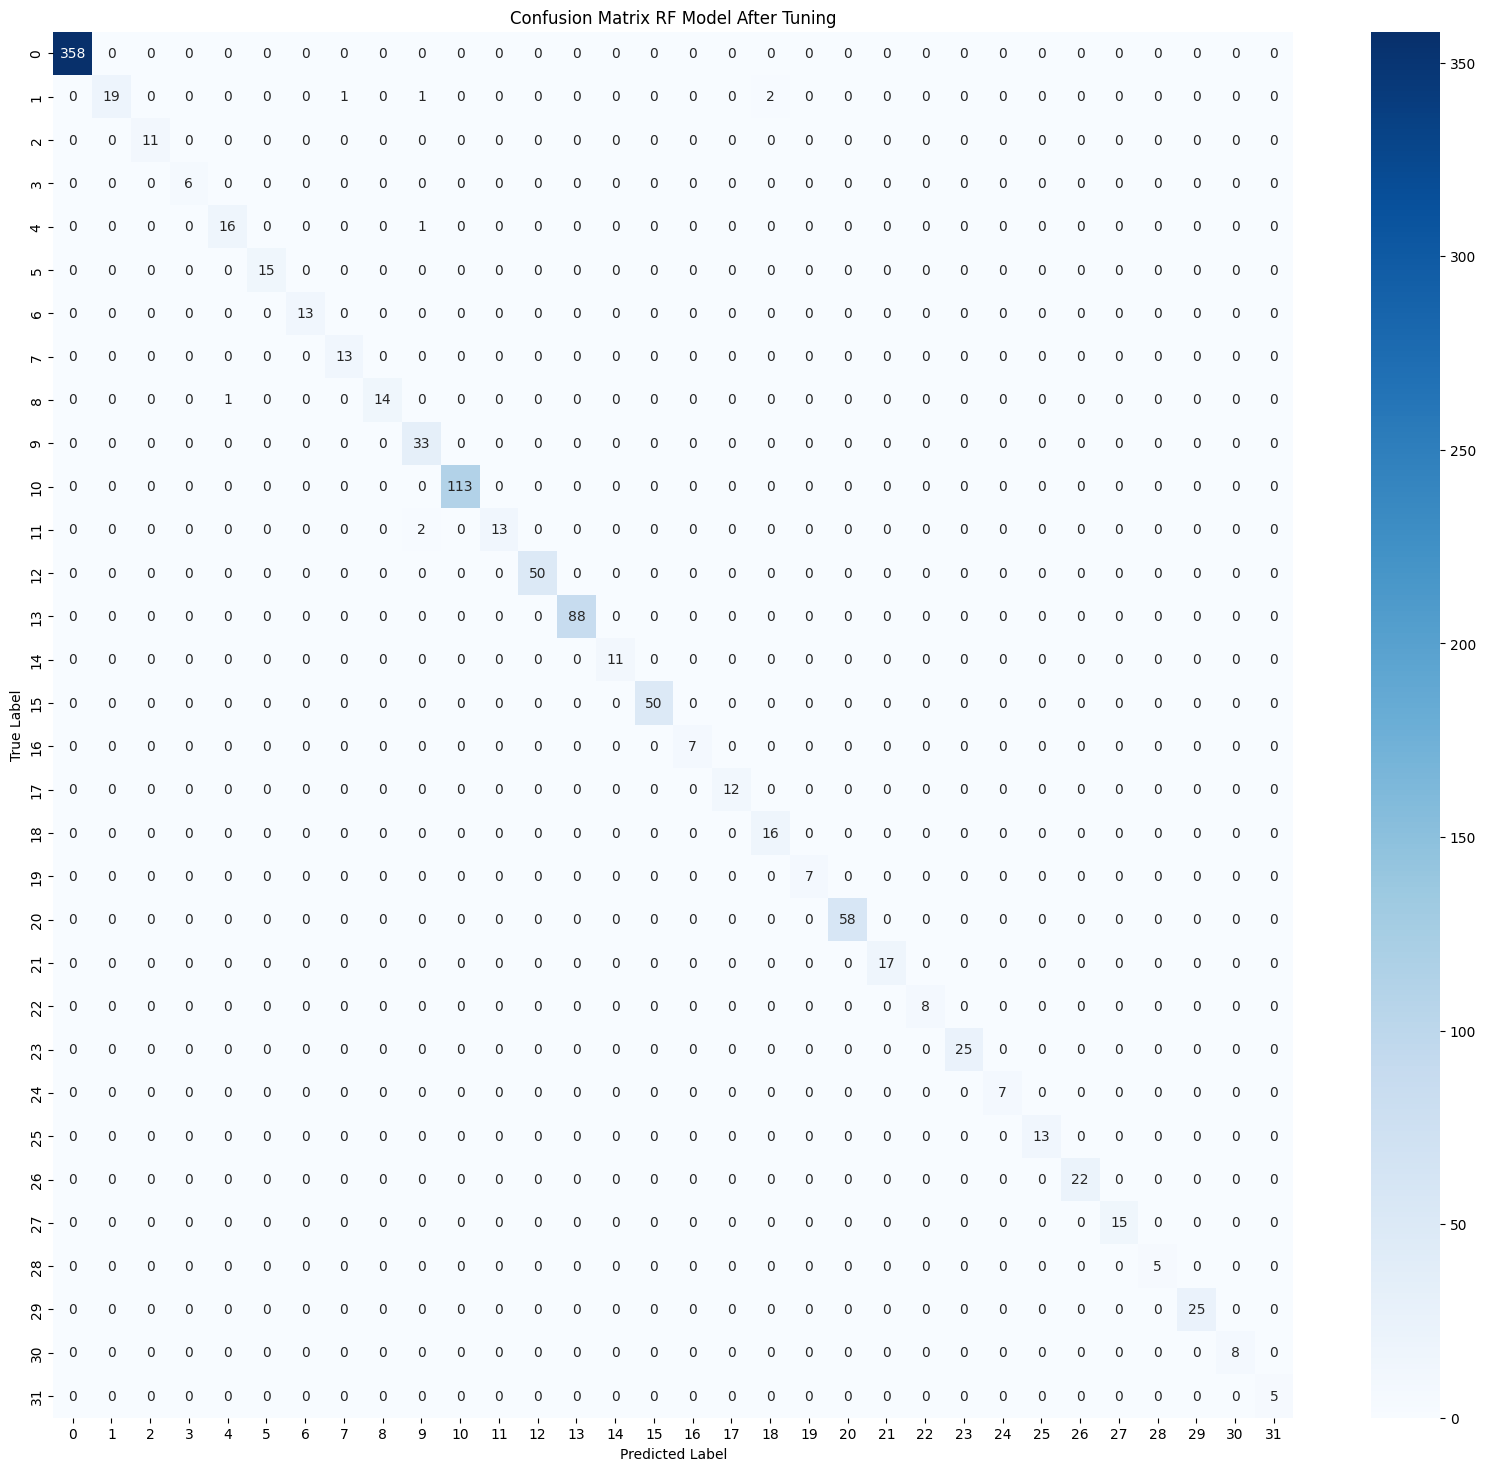

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       358
           1       1.00      0.83      0.90        23
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00         6
           4       0.94      0.94      0.94        17
           5       1.00      1.00      1.00        15
           6       1.00      1.00      1.00        13
           7       0.93      1.00      0.96        13
           8       1.00      0.93      0.97        15
           9       0.89      1.00      0.94        33
          10       1.00      1.00      1.00       113
          11       1.00      0.87      0.93        15
          12       1.00      1.00      1.00        50
          13       1.00      1.00      1.00        88
          14       1.00      1.00      1.00        11
          15       1.00      1.00      1.00        50
          16       1.00      1.00      1.00         7
    

In [12]:
y_second_train_pred_rf = rf_second.predict(x_second_train)
y_second_test_pred_rf = rf_second.predict(x_second_test)

# Evaluasi
scnd_train_accuracy_rf = accuracy_score(y_second_train, y_second_train_pred_rf)
scnd_test_accuracy_rf = accuracy_score(y_second_test, y_second_test_pred_rf)
scnd_train_precision_rf = precision_score(y_second_train, y_second_train_pred_rf, average='weighted', zero_division=1)
scnd_test_precision_rf = precision_score(y_second_test, y_second_test_pred_rf, average='weighted', zero_division=1)
scnd_train_recall_rf = recall_score(y_second_train, y_second_train_pred_rf, average='weighted', zero_division=1)
scnd_test_recall_rf = recall_score(y_second_test, y_second_test_pred_rf, average='weighted', zero_division=1)
scnd_train_f1_rf = f1_score(y_second_train, y_second_train_pred_rf, average='weighted', zero_division=1)
scnd_test_f1_rf = f1_score(y_second_test, y_second_test_pred_rf, average='weighted', zero_division=1)

print("Hasil Latih Model Random Forest Setelah Tuning")
scnd_evaluation_df_rf = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Train Score': [scnd_train_accuracy_rf, scnd_train_precision_rf, scnd_train_recall_rf, scnd_train_f1_rf],
    'Test Score': [scnd_test_accuracy_rf, scnd_test_precision_rf, scnd_test_recall_rf, scnd_test_f1_rf]
})

# Konversi ke format persen
scnd_evaluation_df_rf[['Train Score', 'Test Score']] = scnd_evaluation_df_rf[['Train Score', 'Test Score']].map(lambda x: f"{x:.2%}")

# Menampilkan DataFrame
print(scnd_evaluation_df_rf, end='\n\n')

# Confusion Matrix
cm_rf_2 = confusion_matrix(y_second_test, y_second_test_pred_rf)

# Menghitung TP, FP, FN, TN secara keseluruhan
tp_rf_2 = np.sum(np.diag(cm_rf_2))
fp_rf_2 = np.sum(cm_rf_2) - np.sum(np.diag(cm_rf_2)) - np.sum(np.sum(cm_rf_2, axis=1) - np.diag(cm_rf_2))
fn_rf_2 = np.sum(np.sum(cm_rf_2, axis=1) - np.diag(cm_rf_2))
tn_rf_2 = np.sum(cm_rf_2) - (tp_rf_2 + fp_rf_2 + fn_rf_2)

# Menampilkan hasil
print(f"Total TP: {tp_rf_2}")
print(f"Total FP: {fp_rf_2}")
print(f"Total FN: {fn_rf_2}")
print(f"Total TN: {tn_rf_2}")

# Visualisasi Confusion Matrix
plt.figure(figsize=(20, 18))
sns.heatmap(cm_rf_2, annot=True, fmt='d', cmap='Blues', xticklabels=svm.classes_, yticklabels=svm.classes_)
plt.title('Confusion Matrix RF Model After Tuning')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification Report (Precision, Recall, F1-Score, etc.)
print("Classification Report:")
print(classification_report(y_second_test, y_second_test_pred_rf, zero_division=1))

# Cek distribusi kelas pada data uji
print("Distribusi kelas pada data uji:")
print("Distribusi y_test:", dict(zip(*np.unique(y_second_test, return_counts=True))))
print("Distribusi y_pred:", dict(zip(*np.unique(y_second_test_pred_rf, return_counts=True))))

### Evaluasi Confusion Matrix untuk model SVM setelah tuning

Hasil Latih Model Support Vector Machine (SVM) Setelah Tuning
      Metric Train Score Test Score
0   Accuracy      99.51%     98.89%
1  Precision      99.75%     99.59%
2     Recall      99.51%     98.89%
3   F1-Score      99.35%     98.59%

Total TP: 1069
Total FP: 0
Total FN: 12
Total TN: 0


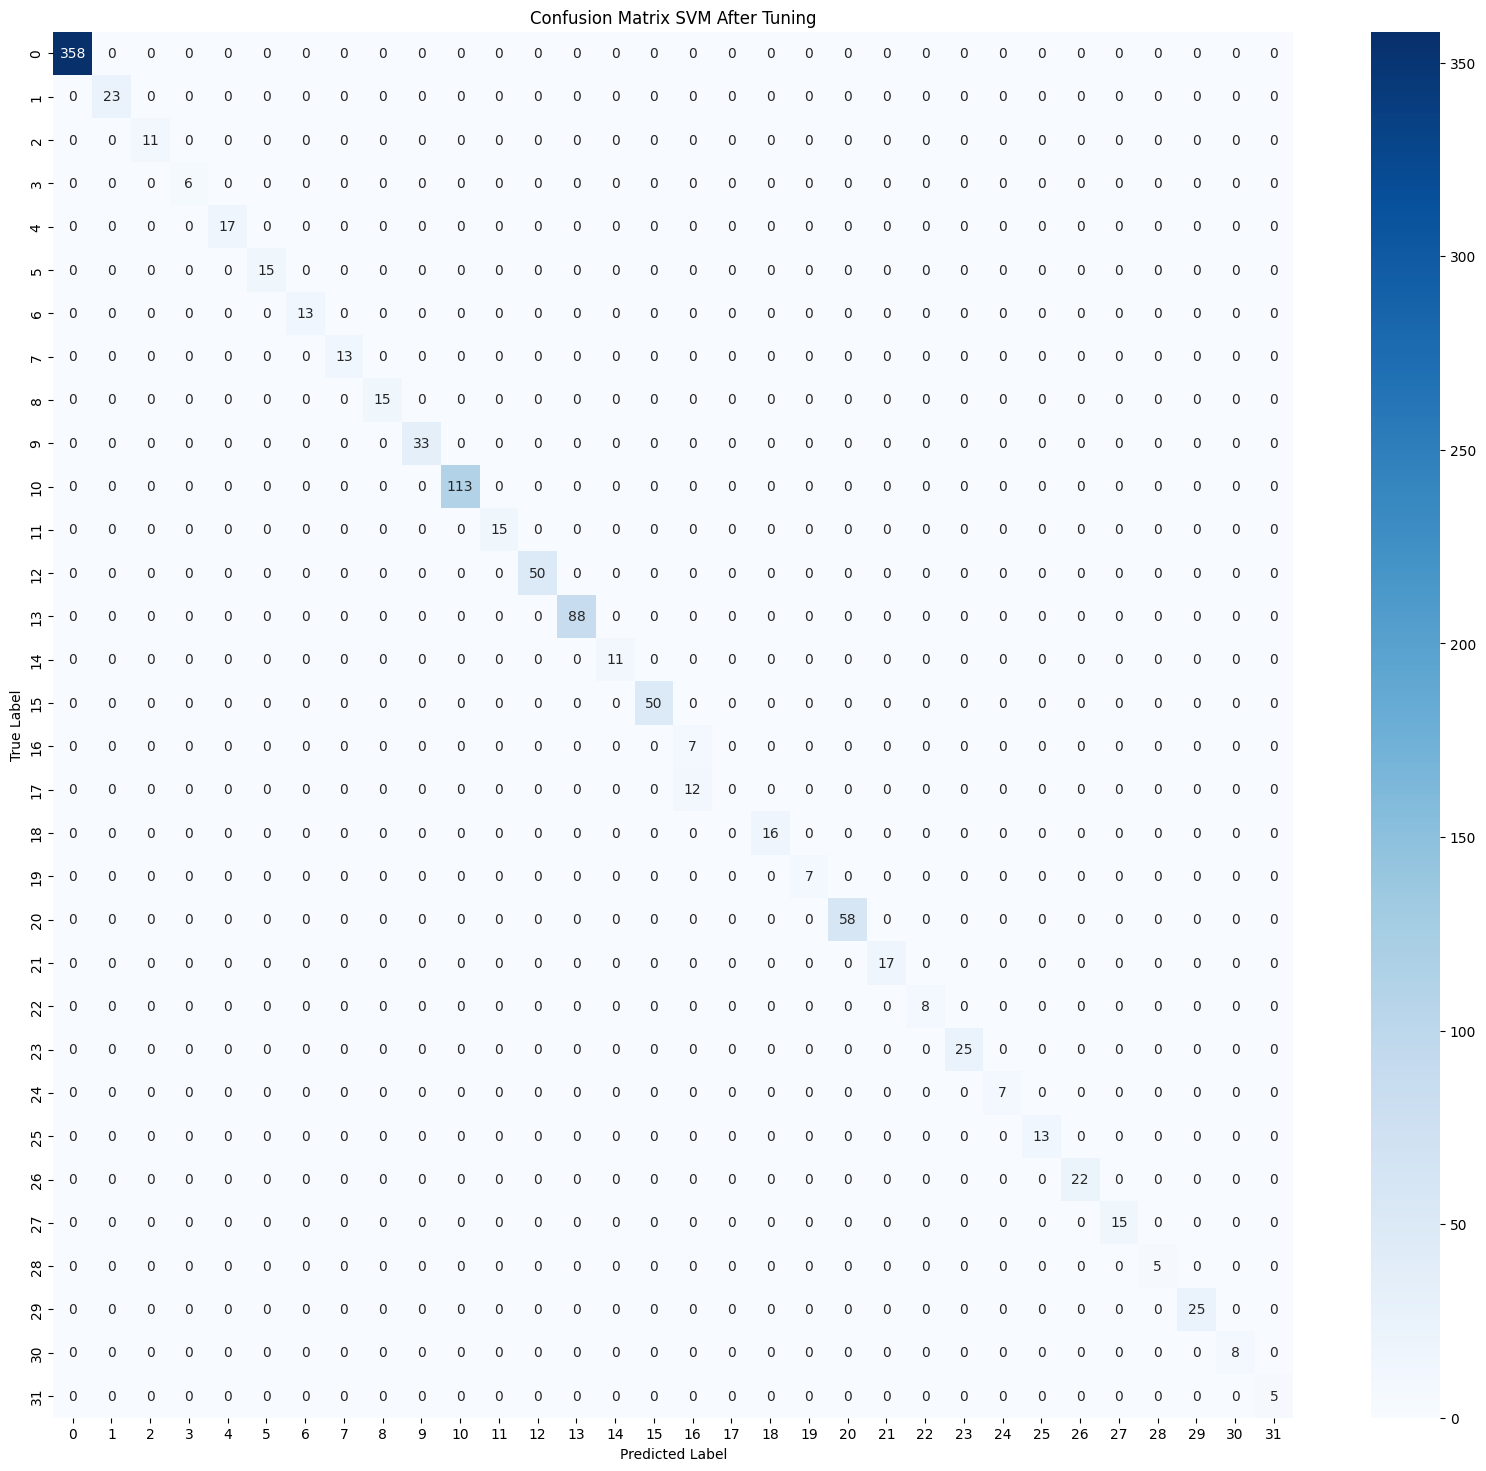

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       358
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00        17
           5       1.00      1.00      1.00        15
           6       1.00      1.00      1.00        13
           7       1.00      1.00      1.00        13
           8       1.00      1.00      1.00        15
           9       1.00      1.00      1.00        33
          10       1.00      1.00      1.00       113
          11       1.00      1.00      1.00        15
          12       1.00      1.00      1.00        50
          13       1.00      1.00      1.00        88
          14       1.00      1.00      1.00        11
          15       1.00      1.00      1.00        50
          16       0.37      1.00      0.54         7
    

In [13]:
y_second_train_pred_svm = svm_second.predict(x_second_train)
y_second_test_pred_svm = svm_second.predict(x_second_test)

# Evaluasi
scnd_train_accuracy_svm = accuracy_score(y_second_train, y_second_train_pred_svm)
scnd_test_accuracy_svm = accuracy_score(y_second_test, y_second_test_pred_svm)
scnd_train_precision_svm = precision_score(y_second_train, y_second_train_pred_svm, average='weighted', zero_division=1)
scnd_test_precision_svm = precision_score(y_second_test, y_second_test_pred_svm, average='weighted', zero_division=1)
scnd_train_recall_svm = recall_score(y_second_train, y_second_train_pred_svm, average='weighted', zero_division=1)
scnd_test_recall_svm = recall_score(y_second_test, y_second_test_pred_svm, average='weighted', zero_division=1)
scnd_train_f1_svm = f1_score(y_second_train, y_second_train_pred_svm, average='weighted', zero_division=1)
scnd_test_f1_svm = f1_score(y_second_test, y_second_test_pred_svm, average='weighted', zero_division=1)

print("Hasil Latih Model Support Vector Machine (SVM) Setelah Tuning")
scnd_evaluation_df_svm = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Train Score': [scnd_train_accuracy_svm, scnd_train_precision_svm, scnd_train_recall_svm, scnd_train_f1_svm],
    'Test Score': [scnd_test_accuracy_svm, scnd_test_precision_svm, scnd_test_recall_svm, scnd_test_f1_svm]
})

# Konversi ke format persen
scnd_evaluation_df_svm[['Train Score', 'Test Score']] = scnd_evaluation_df_svm[['Train Score', 'Test Score']].map(lambda x: f"{x:.2%}")

# Menampilkan DataFrame
print(scnd_evaluation_df_svm, end='\n\n')

# Confusion Matrix
cm_svm_2 = confusion_matrix(y_second_test, y_second_test_pred_svm)

# Menghitung TP, FP, FN, TN secara keseluruhan
tp_svm_2 = np.sum(np.diag(cm_svm_2))
fp_svm_2 = np.sum(cm_svm_2) - np.sum(np.diag(cm_svm_2)) - np.sum(np.sum(cm_svm_2, axis=1) - np.diag(cm_svm_2))
fn_svm_2 = np.sum(np.sum(cm_svm_2, axis=1) - np.diag(cm_svm_2))
tn_svm_2 = np.sum(cm_svm_2) - (tp_svm_2 + fp_svm_2 + fn_svm_2)

# Menampilkan hasil
print(f"Total TP: {tp_svm_2}")
print(f"Total FP: {fp_svm_2}")
print(f"Total FN: {fn_svm_2}")
print(f"Total TN: {tn_svm_2}")

# Visualisasi Confusion Matrix
plt.figure(figsize=(20, 18))
sns.heatmap(cm_svm_2, annot=True, fmt='d', cmap='Blues', xticklabels=svm.classes_, yticklabels=svm.classes_)
plt.title('Confusion Matrix SVM After Tuning')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification Report (Precision, Recall, F1-Score, etc.)
print("Classification Report:")
print(classification_report(y_second_test, y_second_test_pred_svm, zero_division=1))

# Cek distribusi kelas pada data uji
print("Distribusi kelas pada data uji:")
print("Distribusi y_test:", dict(zip(*np.unique(y_second_test, return_counts=True))))
print("Distribusi y_pred:", dict(zip(*np.unique(y_second_test_pred_svm, return_counts=True))))

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

###Model 1: Random Forest

Hasil pelatihan model menunjukkan bahwa dengan menggunakan random forest dengan setting default, model dapat mempelajari dataset dengan baik sehingga mendapatkan hasil:

- Data Train: Seluruh parameter bernilai 100%.

- Data test:
  - Accuracy : 96.58%
  - Precision : 96.61%
  - Recall : 96.58%
  - F1-Score : 96.49%   

Kelemahan : Dikarenakan struktur data yang imbalance (tidak seimbang antar clusternya), jadi di beberapa kelas ada nilai recall dan presision yang rendah diakibatkan model kurang bisa memprediksi kelas-kelas yang datanya sedikit dan sering salah mengklasifikasikan data ke kelas tertentu. Selain itu, indikasi overfitting terjadi karena dalam data train, dia mendapatkan nilai sempurna sementara pada data test, malah menurun cukup signifikan, yakni di sekitar 5%.

#### Hyperparameter tuning

Dilakukan tuning hyperparameter untuk model kedua (SVM) dengan bantuan Random Search. Setelah proses tuning, didapatlah hasil kombinasi parameter terbaik, yakni:
- n_estimators=200
- min_samples_split=5
- min_samples_leaf=1
- max_depth=None
- class_weight='balanced'
- random_state=42

Hasil tuningnya, ialah sebagai berikut:
- Data Train: Seluruh parameter bernilai 100%.

- Data test:
  - Accuracy : 99.26%
  - Precision : 99.33%
  - Recall : 99.26%
  - F1-Score : 99.25%

Dengan hyperparameter tuning, berhasil mengurangi setidaknya indikasi overfitting yang terjadi pada sebelum dilakukannya tuning. Berikut adalah grafik perbandingannya.

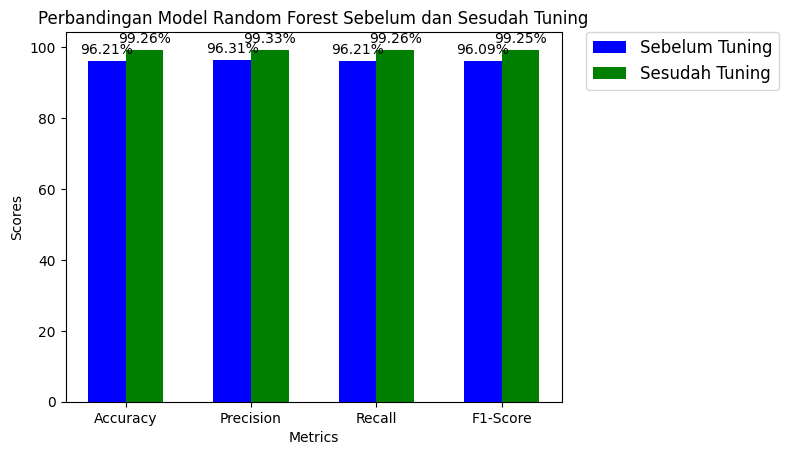

<Figure size 1000x600 with 0 Axes>

In [14]:
# Grafik perbandingan Random Forest
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

before_tuning = [96.21, 96.31, 96.21, 96.09]
after_tuning = [99.26, 99.33, 99.26, 99.25]

# Menentukan posisi grafik
x = np.arange(len(metrics))  # Posisi untuk metrik
width = 0.3  # Lebar bar

# Membuat grafik
fig, ax = plt.subplots()

# Menambahkan bar untuk data sebelum dan setelah tuning
rects1 = ax.bar(x - width/2, before_tuning, width, label='Sebelum Tuning', color='blue')
rects2 = ax.bar(x + width/2, after_tuning, width, label='Sesudah Tuning', color='green')

# Menambahkan label dan judul
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Perbandingan Model Random Forest Sebelum dan Sesudah Tuning')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Menambahkan nilai di atas setiap bar
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}%',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # offset label
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize=12)

# Sesuaikan ukuran gambar
plt.figure(figsize=(10, 6))

# Menampilkan grafik
plt.tight_layout()
plt.show()


### Model 2: Support Vector Machine (SVM)

Sementara untuk model Support Vector Machine (SVM) dengan setting default, hasilnya:
- Data Train:
  - Accuracy : 44.85073%
  - Precision : 75.77301%
  - Recall : 44.85073%
  - F1-Score : 32.40441%  
- Data test:
  - Accuracy : 43.10823%
  - Precision : 76.25638%
  - Recall : 43.10823%
  - F1-Score : 31.26537%

Kelemahan: Hasil yang didapatkan menunjukkan bahwa model SVM dengan pengaturan default kurang dapat menangkap pola dalam data latih, yang terlihat dari rendahnya akurasi baik pada data latih maupun data uji. Meskipun Precision cukup tinggi (sekitar 75%), ini artinya ketika model memprediksi sesuatu sebagai positif, prediksinya cenderung benar. Namun, model kesulitan dalam menemukan semua data positif yang sebenarnya ada, yang tercermin pada nilai Recall yang rendah. Melihat dari confusion matrix, terlihat bahwa model SVM kesulitan dalam memprediksi beberapa kelas, yang mungkin disebabkan oleh pengaturan parameter yang belum optimal, seperti kernel, C, atau gamma. Oleh karena itu, tuning parameter atau menggunakan teknik seperti SMOTE untuk menangani masalah data yang tidak seimbang mungkin bisa membantu memperbaiki kinerjanya.


#### Hyperparameter Tuning

Karena nilai untuk model SVM dirasa kurang, sehingga dilakukan tuning untuk model kedua (SVM). Dilakukan tuning hyperparameter untuk model kedua (SVM) dengan bantuan Random Search.

Setelah dilakukan proses tuning dengan beberapa ketentuan, terlihat beberapa skema parameter yang malah membuat model menjadi overfitting (dilihat dari hasil test yang sangat sempurna yakni 100%). Oleh karena itu dipilih kombinasi parameter yang masih tinggi dalam batas wajar yakni dengan susunan:
- kernel='rbf'
- gamma='auto'
- degree=1
- C=0.1
- random_state=42

Hasil latih dengan skema parameter tersebut adalah sebagai berikut:
- Data Train:
  - Accuracy : 99.51%
  - Precision :  99.75%
  - Recall : 99.51%  
  - F1-Score : 99.35%
- Data test:
  - Accuracy : 98.89%
  - Precision : 99.59%
  - Recall : 98.89%
  - F1-Score : 98.59%

Proses hyperparameter tuning berhasil memperbaiki nilai dan membuat model lebih bisa dilatih dengan dataset. Berikut perbandingan antara sebelum dan sesudah tuning:

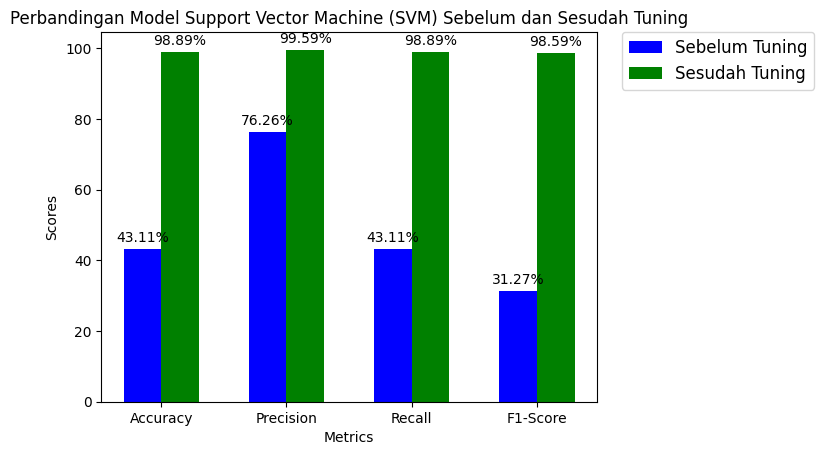

<Figure size 1000x600 with 0 Axes>

In [15]:
# Grafik Perbandingan SVM
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

before_tuning = [43.11, 76.26, 43.11, 31.27]
after_tuning = [98.89, 99.59, 98.89, 98.59]

# Menentukan posisi grafik
x = np.arange(len(metrics))  # Posisi untuk metrik
width = 0.3  # Lebar bar

# Membuat grafik
fig, ax = plt.subplots()

# Menambahkan bar untuk data sebelum dan setelah tuning
rects1 = ax.bar(x - width/2, before_tuning, width, label='Sebelum Tuning', color='blue')
rects2 = ax.bar(x + width/2, after_tuning, width, label='Sesudah Tuning', color='green')

# Menambahkan label dan judul
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Perbandingan Model Support Vector Machine (SVM) Sebelum dan Sesudah Tuning')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Menambahkan nilai di atas setiap bar
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}%',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # offset label
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize=12)

# Sesuaikan ukuran gambar
plt.figure(figsize=(10, 6))

# Menampilkan grafik
plt.tight_layout()
plt.show()


### Kesimpulan

Dengan hasil penyusunan model machine learning menggunakan dataset hasil clustering pada tugas sebelumnya, sudah dapat dikatakan baik. Namun, kedua model tersebut memiliki kekurangan dan tantangan masing-masing dalam memahami, menangkap, dan mengklasifikasikan data yang dihasilkan dari dataset. Salah satu masalah yang cukup mencolok pada dataset Appstore ini adalah adanya overfitting pada kedua model. Oleh karena itu, diperlukan proses hyperparameter tuning yang seksama untuk mengoptimalkan kinerja model. Selain itu, kualitas dataset juga perlu diperhatikan, baik dengan menambah data yang relevan maupun memperbaiki kualitas data yang ada, agar model dapat belajar dengan lebih baik dan menghasilkan prediksi yang lebih akurat.